In [1]:
 pip install librosa

<ipython-input-3-c08c84e49931>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load('/content/audioai.unknown', sr=None, mono=True)


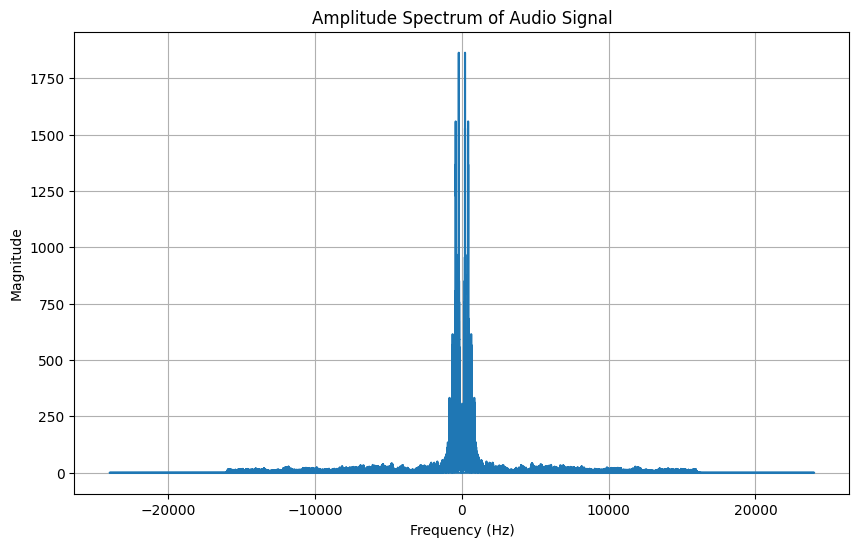

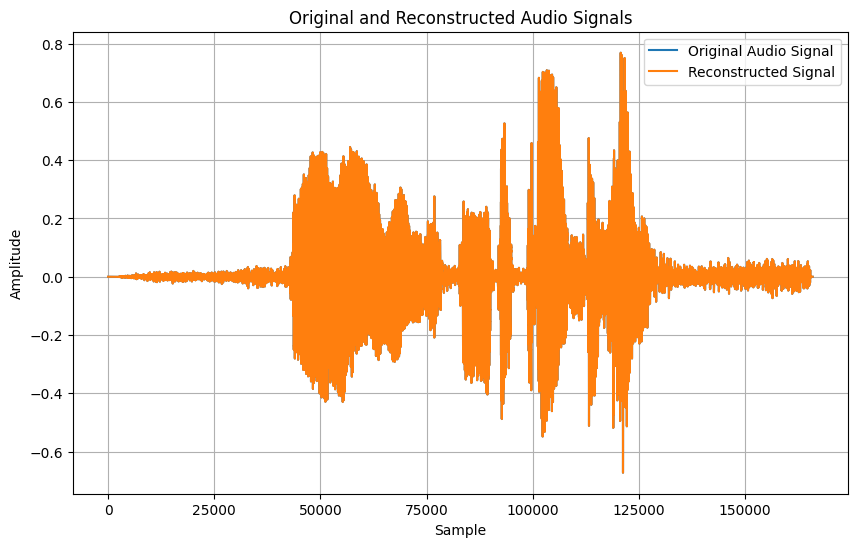

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_data, sample_rate = librosa.load('/content/audioai.unknown', sr=None, mono=True)

spectral_components = np.fft.fft(audio_data)

magnitude_spectrum = np.abs(spectral_components)

plt.figure(figsize=(10, 6))
plt.plot(np.fft.fftfreq(len(audio_data), 1 / sample_rate), magnitude_spectrum)
plt.title('Amplitude Spectrum of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

reconstructed_signal = np.fft.ifft(spectral_components)

plt.figure(figsize=(10, 6))
plt.plot(audio_data, label='Original Audio Signal')
plt.plot(reconstructed_signal.real, label='Reconstructed Signal')
plt.title('Original and Reconstructed Audio Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


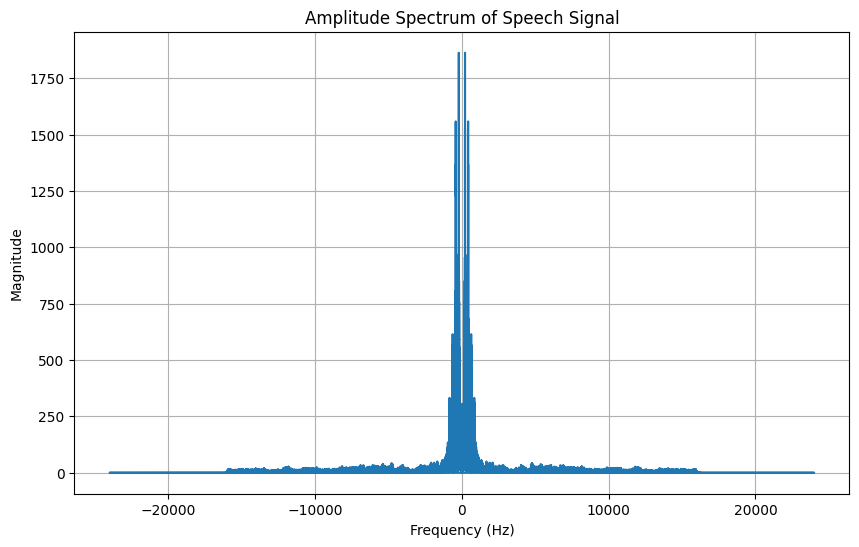

In [4]:
spectral_components = np.fft.fft(audio_data)

magnitude_spectrum = np.abs(spectral_components)

plt.figure(figsize=(10, 6))
plt.plot(np.fft.fftfreq(len(audio_data), 1 / sample_rate), magnitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

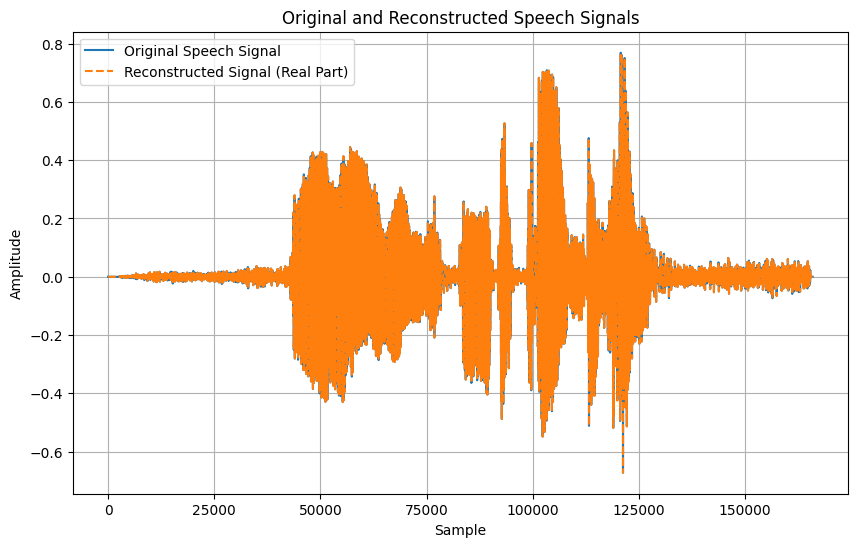

In [5]:
reconstructed_signal = np.fft.ifft(spectral_components)

plt.figure(figsize=(10, 6))
plt.plot(audio_data, label='Original Speech Signal')
plt.plot(reconstructed_signal.real, label='Reconstructed Signal (Real Part)', linestyle='--')
plt.title('Original and Reconstructed Speech Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from IPython.display import Audio
num_freq_bins = len(spectral_components)
window = np.zeros_like(spectral_components)
cutoff_freq = 1000
window[:cutoff_freq] = 10

filtered_spectral_components = spectral_components * window

filtered_signal = np.fft.ifft(filtered_spectral_components)

Audio(filtered_signal.real, rate=sample_rate)

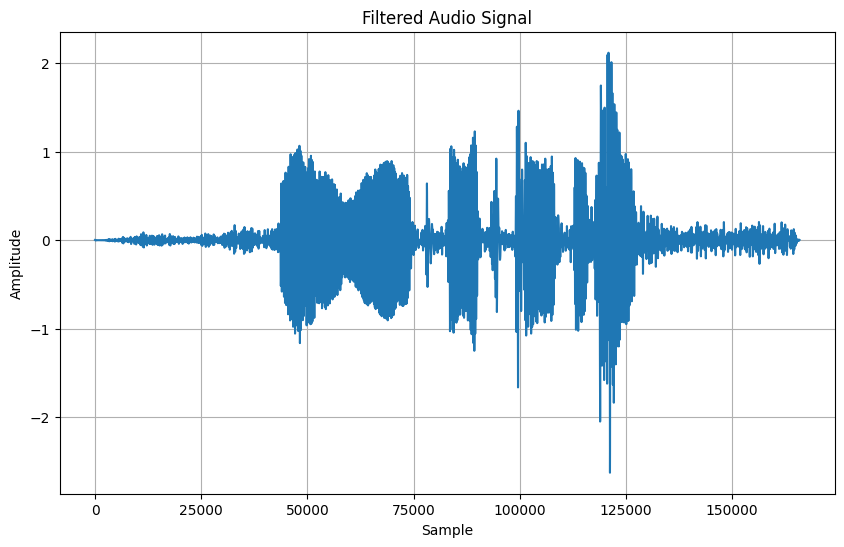

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal.real)
plt.title('Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

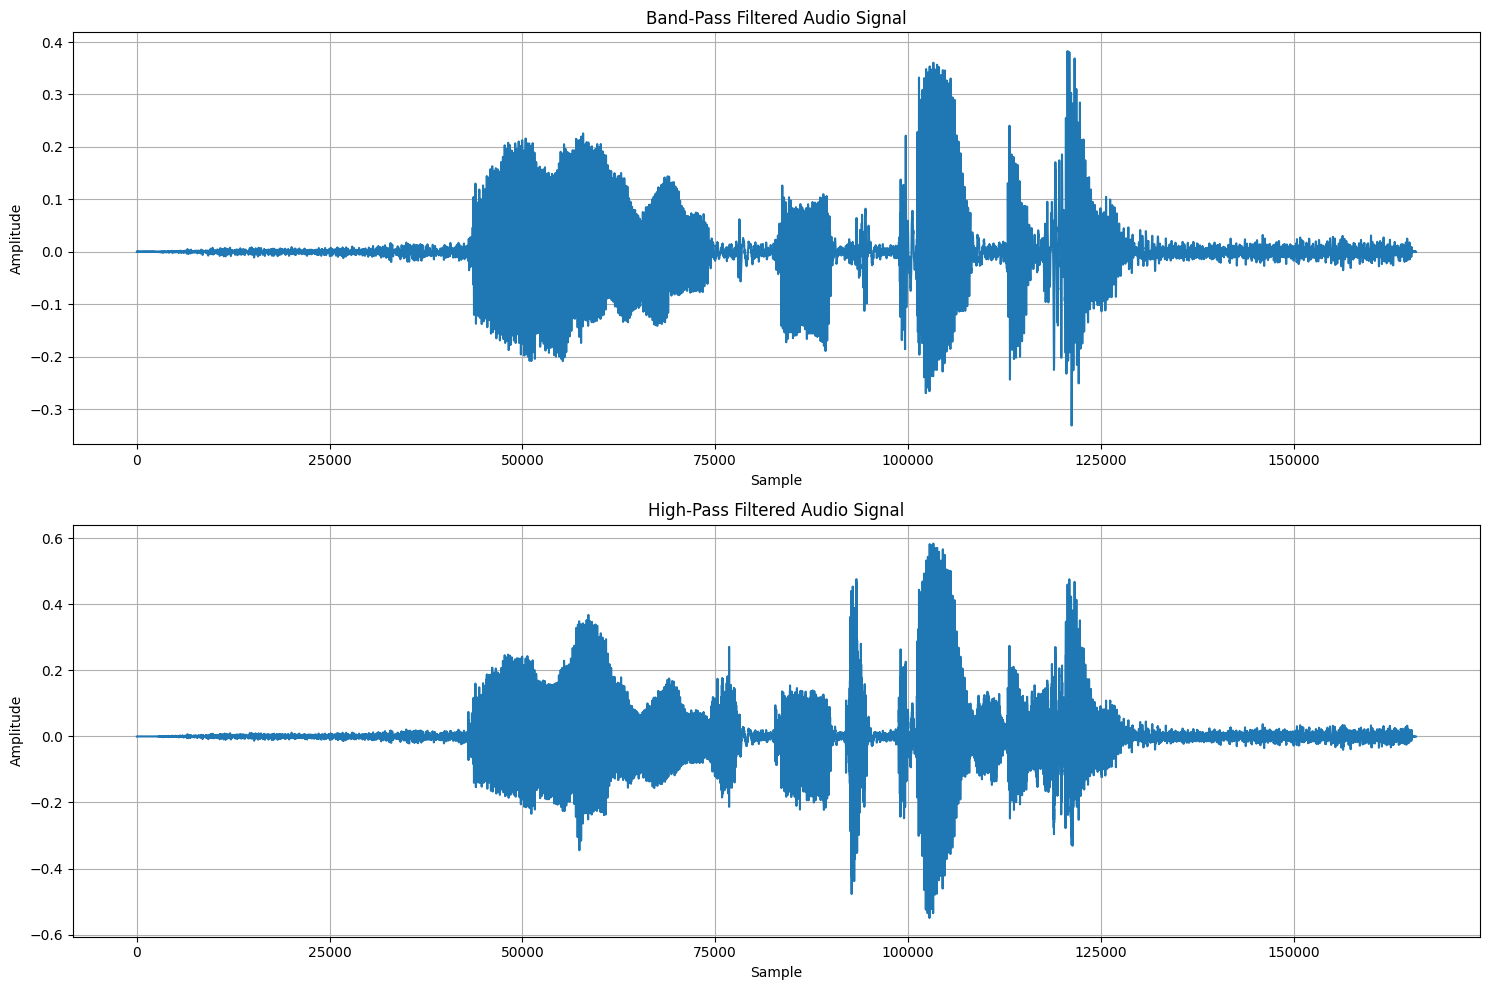

In [14]:
low_cutoff_freq = 100
high_cutoff_freq = 5000
highpass_cutoff_freq = 2000

num_freq_bins = len(spectral_components)
bandpass_window = np.zeros_like(spectral_components)
highpass_window = np.zeros_like(spectral_components)

bandpass_window[low_cutoff_freq:high_cutoff_freq] = 1
highpass_window[highpass_cutoff_freq:] = 1


bandpass_filtered_spectral_components = spectral_components * bandpass_window
highpass_filtered_spectral_components = spectral_components * highpass_window

bandpass_filtered_signal = np.fft.ifft(bandpass_filtered_spectral_components)
highpass_filtered_signal = np.fft.ifft(highpass_filtered_spectral_components)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(bandpass_filtered_signal.real)
plt.title('Band-Pass Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(highpass_filtered_signal.real)
plt.title('High-Pass Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()



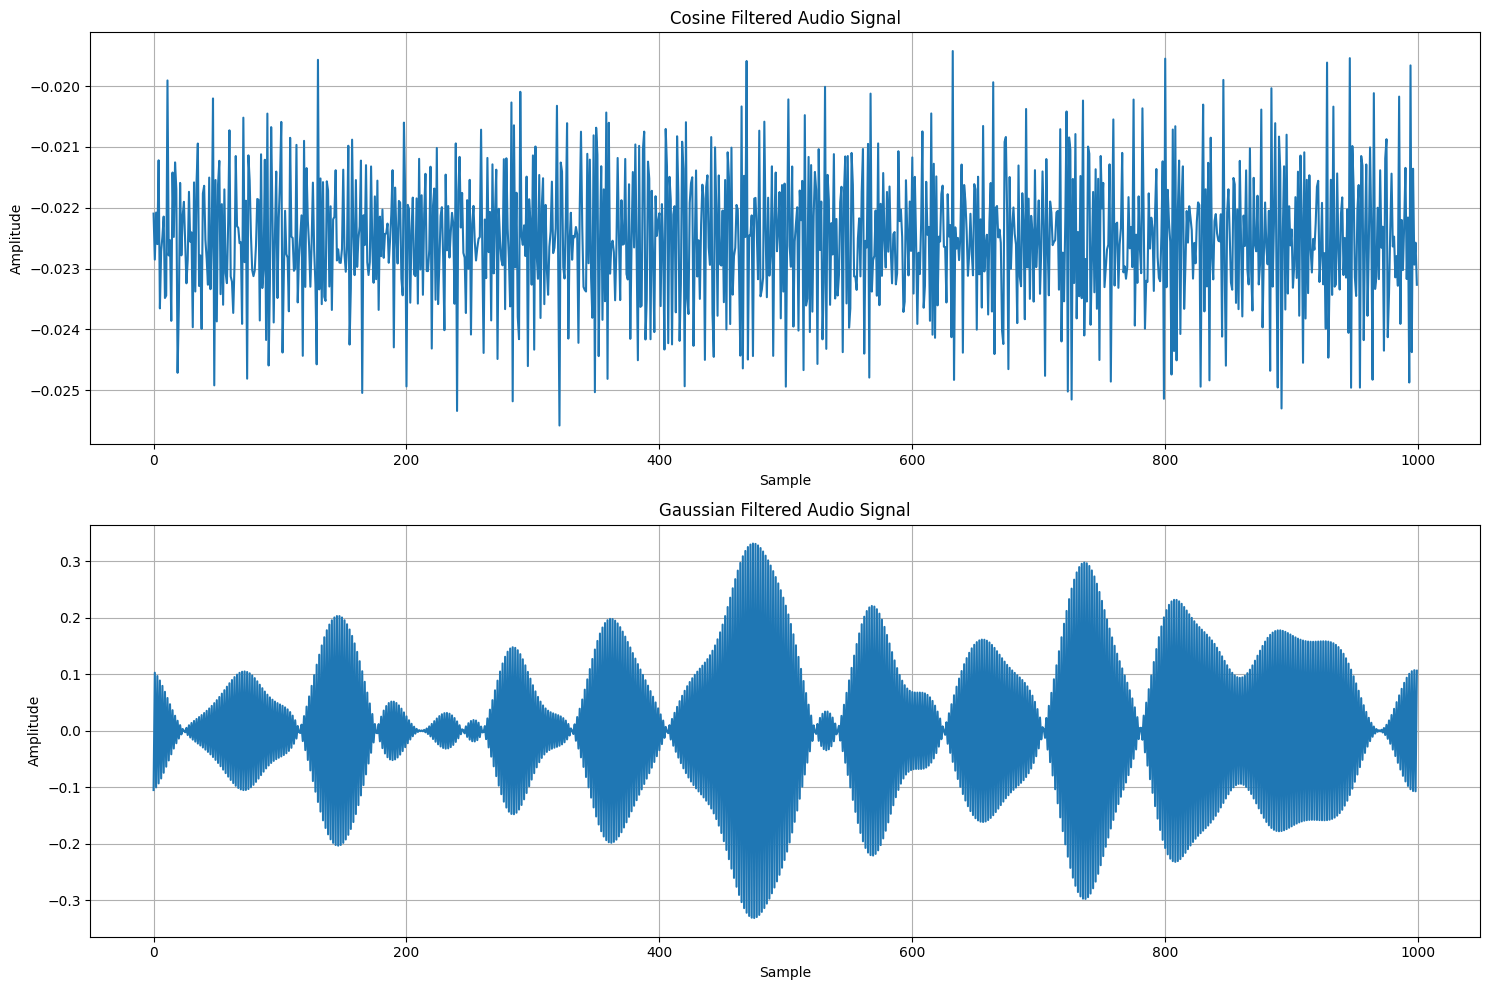

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def get_window(window_type, length):
    if window_type == 'cosine':
        return np.cos(np.linspace(0, np.pi, length))
    elif window_type[0] == 'gaussian':
        sigma = window_type[1]
        return np.exp(-0.5 * ((np.arange(length) - length / 2) / sigma) ** 2)
    else:
        raise ValueError("Unsupported window type")
# Sample audio data and sample rate
audio_data = np.random.randn(1000)
sample_rate = 44100

# Parameters
cutoff_freq = 1000
window_length = len(audio_data)

# Apply windowing and filtering
cosine_filtered_signal = apply_window_and_filter('cosine', audio_data, sample_rate, cutoff_freq)
gaussian_filtered_signal = apply_window_and_filter(('gaussian', 10), audio_data, sample_rate, cutoff_freq)

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(cosine_filtered_signal)
plt.title('Cosine Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(gaussian_filtered_signal)
plt.title('Gaussian Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
